In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
# Reading two csv files and combining them together
def read_data():

    df1=pd.read_csv('../outputfile_1.csv')
    df2=pd.read_csv('../outputfile_2.csv')
    df3=pd.read_csv('../outputfile_3.csv')
    df4=pd.read_csv('../outputfile_4.csv')

# df_parking=pd.read_csv('parking.csv')

    df=pd.concat([df1,df2,df3,df4])
    df_park=pd.concat([df2,df3,df4])
    df['VEHICLE']=np.where((df['CARS']==0) & (df['TWO_WHEELER']==0),0,1)
    df_park['VEHICLE']=np.where((df_park['CARS']==0) & (df_park['TWO_WHEELER']==0),0,1)
    return df,df_park
df,df_park=read_data()

In [3]:
def map_access_dis(ACCESS_DIS):
    if ACCESS_DIS in [1, 2]:
        return ACCESS_DIS
    elif ACCESS_DIS in [3,4]:
        return 3
    elif ACCESS_DIS in [5,6,7,8]:
        return 4
    elif ACCESS_DIS in [9,10,11]:
        return 5

# Apply the mapping function to create the 'ACCESS_DIS_B' column
df['ACCESS_DIS_B'] = df['ACCESS_DIS'].apply(map_access_dis)



# convert all values of EGRESS_DIS into integers
df["EGRESS_DIS"]=df["EGRESS_DIS"].astype(int)

def map_egress_dis(EGRESS_DIS):
    if EGRESS_DIS in [1,2]:
        return int(EGRESS_DIS)
    if EGRESS_DIS in [3,4]:
        return 3
    if EGRESS_DIS in [5,6,7,8]:
        return 4
    if EGRESS_DIS in [9,10,11]:
        return 5
    elif EGRESS_DIS in [0]:
        return 2
    
    

# Apply the mapping function to create the 'EGRESS_DIS_B' column
df['EGRESS_DIS_B'] = df['EGRESS_DIS'].apply(map_egress_dis)


In [4]:
def map_age():
    age_mapping = {
    "18-25 yrs": 21.5,
    '> 60 yrs ':65,
    '36-45yrs ':40, 
    '36-45 yrs ':40, 
    '18-25 yrs ':22,
    '26-35 yrs ':30,
    '18-25yrs ':22,
    '26-35yrs ':30, 
    '46-60 yrs ':54,
      '46-60yrs ':54
    }

# Map the 'AGE' column to average values
    df['AGE'] = df['AGE'].map(age_mapping)
    df_park['AGE']=df_park['AGE'].map(age_mapping)

    return df,df_park

df,df_park=map_age()



In [5]:
def map_income():
       income_mapper={'>2 Lakhs':3, 'nan':0, '25,001 – 50,000':1, '1,00,001 – 2,00,000':3,
       '10,001 – 25,000':1, '50,001 – 1,00,000':2, '<=10,000':1}
       df['INCOME']=df.INCOME.map(income_mapper)
       df_park['INCOME']=df_park.INCOME.map(income_mapper)

       # print(df['INCOME'].value_counts())

       return df,df_park


In [6]:
access_map={1:'Walk',2:'Bicycle',3:'Two wheeler',4:'Car',5:'Ride hire',6:'Ride hire',7:'Ride hire',8:'Other',9:'Other',10:'Other',11:'Other',12:'Other'}

# create a new column mapping ACCESS_M to above dictionary

df['A_M']=df['ACCESS_M'].map(access_map)



egress_map={1:'Walk',2:'Bicycle',3:'Two wheeler',4:'Car',5:'Ride hire',6:'Ride hire',7:'Ride hire',8:'Other',9:'Other',10:'Other',11:'Other',12:'Other'}

# create a new column mapping EGRESS_M to above dictionary

df['E_M']=df['EGRESS_M'].map(egress_map)

Text(0.5, 1.0, 'Response to use own bicycle if parking is provided')

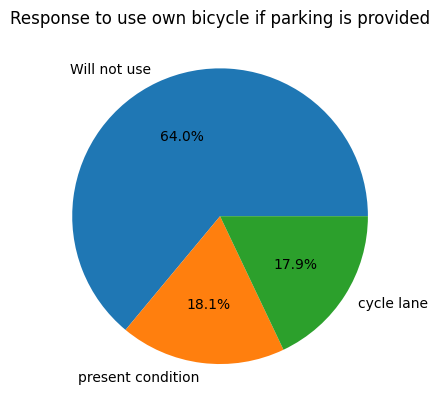

In [25]:
df1=df_park[df_park['PARK']!=3]
# lets visualize PARK column with a pie chart

plt.pie(df1['PARK'].value_counts(),labels=['Will not use','present condition','cycle lane'],autopct='%1.1f%%')
plt.title('Response to use own bicycle if parking is provided')

In [27]:
df1['N_BICYCLES'].value_counts()

0    1018
1     238
2      32
3       5
Name: N_BICYCLES, dtype: int64